In [9]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [10]:
df = pd.read_json("final_corpus.json")

In [11]:
len(df) #427079

427079

In [12]:
# # Remove the Brown corpus
df = df[df.corpus != "brown"]
# # Remove embedded fragments
# df = df[df.v1_after != ""]

In [13]:
len(df) #422983

422983

In [14]:
df['emb_verb'] = df['emb_verb'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})
df['v1_after'] = df['v1_after'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})

In [15]:
rel = df.loc[df.questType.isin(["Relative Clause"])]
root = df[df.questType == "Root Question"]
emb = df[df.questType == "Embeded Question"]
mod = er[er.clauseType == "Modal"]
fin = er[er.clauseType == "Finite"]
nonfin = er[er.clauseType == "Non-Finite"]

In [18]:
df_type = df.loc[df.questType.isin(["Root Question", "Embeded Question"])]
# df_type = df.loc[df.questType.isin(["Root Question", "Embeded Question"])]

In [16]:
df.groupby(['medium'])['medium'].count()

medium
print     373691
spoken     49292
Name: medium, dtype: int64

In [9]:
df.pivot_table(index=['medium'], values='sentence', aggfunc=len).reset_index()

,medium,sentence
0,print,373691
1,spoken,49292


In [ ]:
# This makes the display show more info
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
# Settings for seaborn

# sea blues and greens
# sns.set_palette(sns.cubehelix_palette(5, start=1.5, rot=-.75))

# Purple colors (for corpus graphs):
# palette="ch:.25"

# setting font size:
# sns.set(font_scale=1.5)

# CATPLOT
# height=6, aspect=8/6 # include as paramenter in call
# g.set_xticklabels(rotation=45) # for rotating labels

# BARPLOT
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # for rotating labels

# fig_dims = (8, 6)
# fig, ax = plt.subplots(figsize=fig_dims)

# Overall, questType

In [11]:
# new with refined data
df.pivot_table(index=['questType'], values='sentence', aggfunc=len)

,sentence
questType,
Ambiguous,14026
Embeded Question,37734
Fragment,7815
Relative Clause,326484
Root Question,36924


In [7]:
er.groupby(["questType","clauseType","wh"])["questType","wh"].count()

questType     wh
questType        clauseType wh                     
Embeded Question Finite     how        16993  16993
                            where       9658   9658
                            who         3426   3426
                 Modal      how         3520   3520
                            where        689    689
                            who          300    300
                 Non-Finite how         2664   2664
                            where        425    425
                            who           59     59
Root Question    Finite     how        16452  16452
                            where       7660   7660
                            who         6748   6748
                 Modal      how         4787   4787
                            where        496    496
                            who          750    750
                 Non-Finite how           22     22
                            where          7      7
                            who            2      2

In [14]:
df.pivot_table(index=["questType", "clauseType"], values = 'sentence', aggfunc=len).sentence.transform(lambda x: x/sum(x))

questType         clauseType
Ambiguous         Finite        0.027436
                  Modal         0.003575
                  Non-Finite    0.002149
Embeded Question  Finite        0.071107
                  Modal         0.010660
                  Non-Finite    0.007442
Fragment          Finite        0.016535
                  Modal         0.001118
                  Non-Finite    0.000823
Relative Clause   Finite        0.672325
                  Modal         0.077362
                  Non-Finite    0.022173
Root Question     Finite        0.072958
                  Modal         0.014263
                  Non-Finite    0.000073
Name: sentence, dtype: float64

In [26]:
tot = df.pivot_table(index=['questType'], values='sentence', aggfunc=len).groupby(["questType"]).sentence.transform(lambda x: x/len(df)).reset_index()

In [23]:
tot

,questType,sentence
0,Ambiguous,0.033160
1,Embeded Question,0.089209
2,Fragment,0.018476
3,Relative Clause,0.771861
4,Root Question,0.087294


No handles with labels found to put in legend.


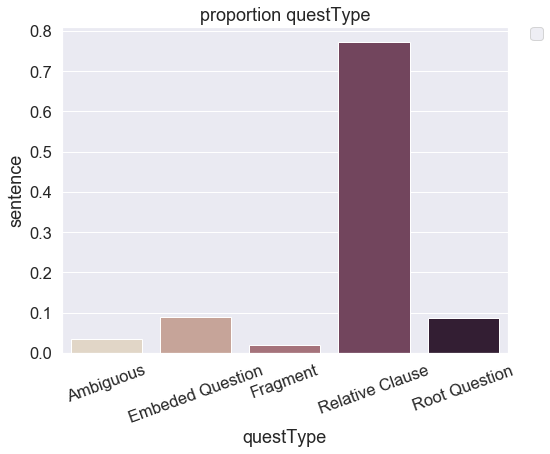

In [27]:
sns.set(font_scale=1.5)
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="questType",y="sentence", palette="ch:.25", data=tot)
g.set_title("proportion questType")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20)
plt.show()

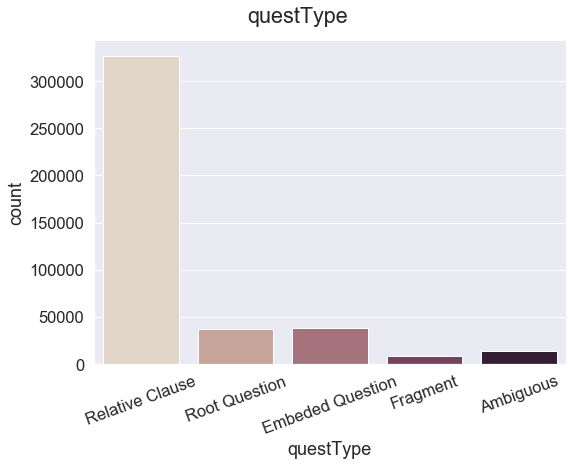

In [33]:
# count of different questType Tags
g = sns.catplot(x="questType", kind="count", palette="ch:.25", height=6, aspect=8/6, data=df)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('questType')
g.set_xticklabels(rotation=20) # for catplot
plt.show()

# questType and clauseType: Root and Embedded only

In [42]:
# counts
df_type.pivot_table(index=['questType','wh','clauseType'], values='sentence', aggfunc=len).groupby(['questType','wh']).sentence.transform(lambda x: x)

questType         wh     clauseType
Embeded Question  how    Finite        16993
                         Modal          3520
                         Non-Finite     2664
                  where  Finite         9658
                         Modal           689
                         Non-Finite      425
                  who    Finite         3426
                         Modal           300
                         Non-Finite       59
Root Question     how    Finite        16452
                         Modal          4787
                         Non-Finite       22
                  where  Finite         7660
                         Modal           496
                         Non-Finite        7
                  who    Finite         6748
                         Modal           750
                         Non-Finite        2
Name: sentence, dtype: int64

In [36]:
dt = df_type.pivot_table(index=['questType','wh','clauseType'], values='sentence', aggfunc=len).groupby(['questType','wh']).sentence.transform(lambda x: x/sum(x)).reset_index()

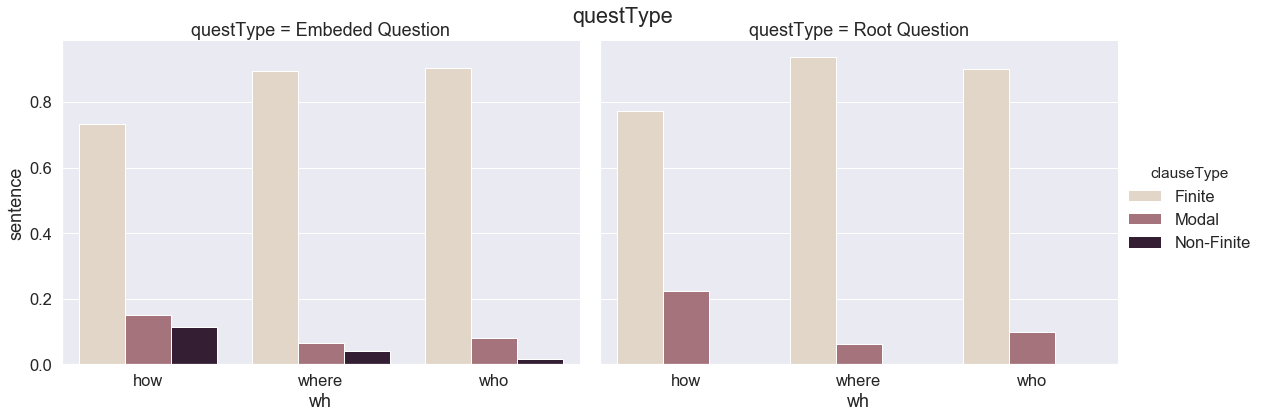

In [38]:
# count of different questType Tags
g = sns.catplot(x="wh", y="sentence", hue="clauseType",col="questType", kind="bar", height=6, aspect=8/6, palette="ch:.25", data=dt)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('questType')
plt.show()

In [82]:
dtt = df_type.pivot_table(index=['questType','wh','clauseType'], values='sentence', aggfunc=len).groupby(['questType','clauseType']).sentence.transform(lambda x: x/sum(x)).reset_index()

In [84]:
df_type.pivot_table(index=['questType','wh','clauseType'], values='sentence', aggfunc=len).groupby(['questType','clauseType']).sentence.transform(lambda x: x).reset_index()

,questType,wh,clauseType,sentence
0,Embeded Question,how,Finite,16993
1,Embeded Question,how,Modal,3520
2,Embeded Question,how,Non-Finite,2664
3,Embeded Question,where,Finite,9658
4,Embeded Question,where,Modal,689
5,Embeded Question,where,Non-Finite,425
6,Embeded Question,who,Finite,3426
7,Embeded Question,who,Modal,300
8,Embeded Question,who,Non-Finite,59
9,Root Question,how,Finite,16452


In [85]:
df_type.pivot_table(index=['questType','wh'], values='sentence', aggfunc=len).groupby(['questType','wh']).sentence.transform(lambda x: x).reset_index()

,questType,wh,sentence
0,Embeded Question,how,23177
1,Embeded Question,where,10772
2,Embeded Question,who,3785
3,Root Question,how,21261
4,Root Question,where,8163
5,Root Question,who,7500


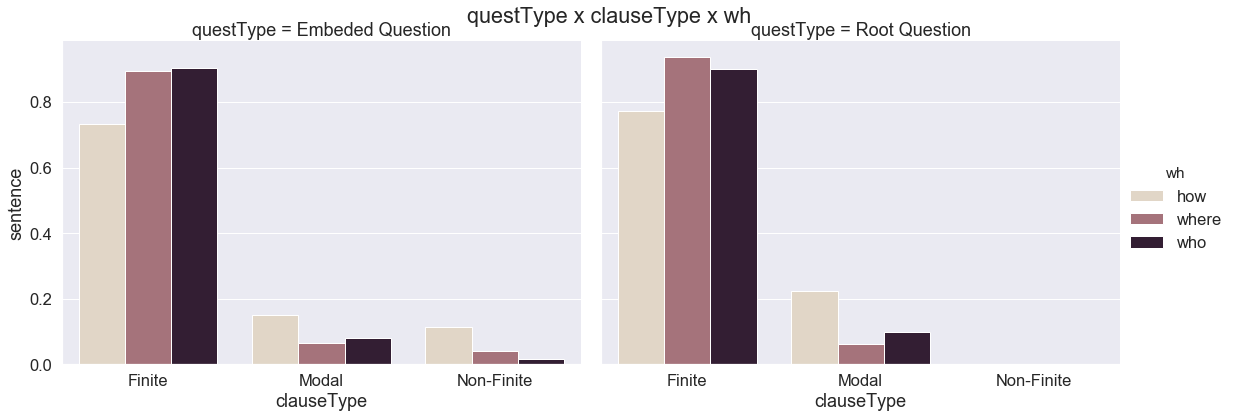

In [68]:
g = sns.catplot(x="clauseType", y="sentence", hue="wh", col="questType", kind="bar", height=6, aspect=8/6, palette="ch:.25", data=dt)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('questType x clauseType x wh')
plt.show()

In [39]:
dt_eq = dt.loc[dt.questType.isin(["Embeded Question"])]
dt_rt = dt.loc[dt.questType.isin(["Root Question"])]

# questType: Root

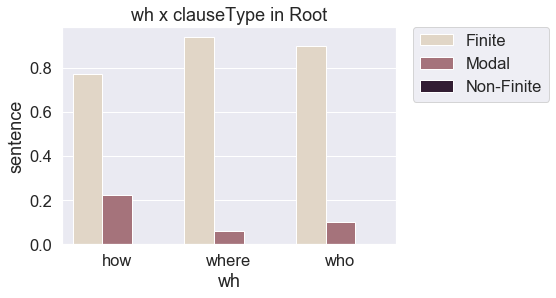

In [40]:
g = sns.barplot(x="wh",y="sentence", hue="clauseType", palette="ch:.25", data=dt_rt)
g.set_title("wh x clauseType in Root")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

What do those Finite and modal clauses look like?

In [68]:
root.iloc[1500]

corpus        bnc                                
medium        print                              
sentence      How long is a piece of string?     
clauseType    Finite                             
phrase                                           
wh            how                                
questType     Root Question                      
heuristic     ?                                  
v_before                                         
v1_after      is                                 
v2_after                                         
v3_after                                         
wh_v1         [[How, WRB], [long, JJ], [is, VBZ]]
mat_verb      None                               
emb_verb      be                                 
Name: 23463, dtype: object

In [70]:
root.sentence

104       Who told them not to communicate , who actually authorised the change in nature of the company ' s businesses ? "                                 
105       Who told them not to communicate , who actually authorised the change in nature of the company ' s businesses ? "                                 
443       Who ' s most at risk ?                                                                                                                            
769       How could it skirt assimilation with the native British majority and impose a language , laws , economy and culture whose stamp is visible today ?
882       Who decides ?                                                                                                                                     
              ...                                                                                                                                           
426863    Who 's telling the truth ?                      

In [136]:
root.loc[root.clauseType.isin(["Non-Finite"])].sentence

9698      How about a quick kiss to seal the pact?’                                                                                                                
14581     ‘How many miles to Babylon?’                                                                                                                             
15337     Who, except the most avant-garde of modern dramatists, attempts to write as they speak?’(1977:124).                                                      
16114     ‘How far to the Motorway?’                                                                                                                               
46269     Where to now, or can't you say?’                                                                                                                         
123500    How to avoid the traps of both Genius and Whimsy? wrote Harsnet (typed Goldberg).                                                                        
123517    How th

In [137]:
len(root.loc[root.clauseType.isin(["Non-Finite"])])

31

# questType: Embedded

In [69]:
emb.sentence

246       The Government can choose who it does business with and the Government usually chooses to do business with people whom it thinks are trustworthy , who are not going to commit fraud with federal dollars ," he said .                                                                       
247       The Government can choose who it does business with and the Government usually chooses to do business with people whom it thinks are trustworthy , who are not going to commit fraud with federal dollars ," he said .                                                                       
248       The Government can choose who it does business with and the Government usually chooses to do business with people whom it thinks are trustworthy , who are not going to commit fraud with federal dollars ," he said .                                                                       
364       A voodoo follower at an international celebration of voodoo spirituality in the West African country o

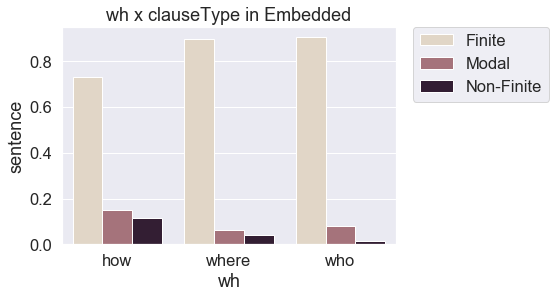

In [41]:
g = sns.barplot(x="wh",y="sentence", hue="clauseType", palette="ch:.25", data=dt_eq)
g.set_title("wh x clauseType in Embedded")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# WH overall

In [20]:
who = df_type.loc[df_type.wh == "who"]
where = df_type.loc[df_type.wh == "where"]
how = df_type.loc[df_type.wh == "how"]

In [63]:
# first filter so its not a super long list. We want to see the most frequent ones.
how_evs = how.groupby('emb_verb').filter(lambda x: len(x) >= 1000)
how_evs_count = how_evs.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [64]:
how_evs.pivot_table(index=["emb_verb"], values = 'sentence', aggfunc=len).groupby(["emb_verb"]).sentence.transform(lambda x: x/len(how)).reset_index()

,emb_verb,sentence
0,'s,0.055831
1,be,0.229961
2,can,0.069513
3,could,0.040596
4,do,0.184752
5,have,0.063144
6,would,0.033935


In [65]:
how_evs_count

,emb_verb,count
1,be,10219
4,do,8210
2,can,3089
5,have,2806
0,'s,2481
3,could,1804
6,would,1508


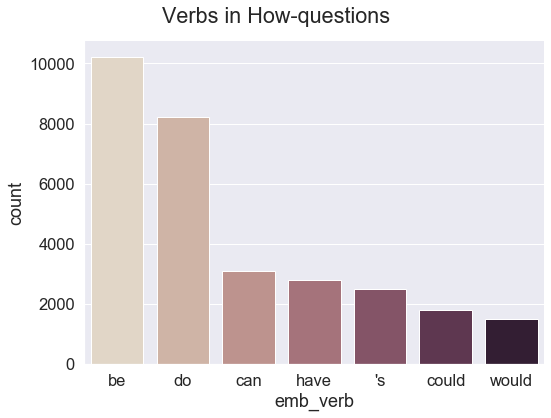

In [67]:
# sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", height=6, aspect=8/6, palette="ch:.25", data=how_evs_count)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Verbs in How-questions')
plt.show()

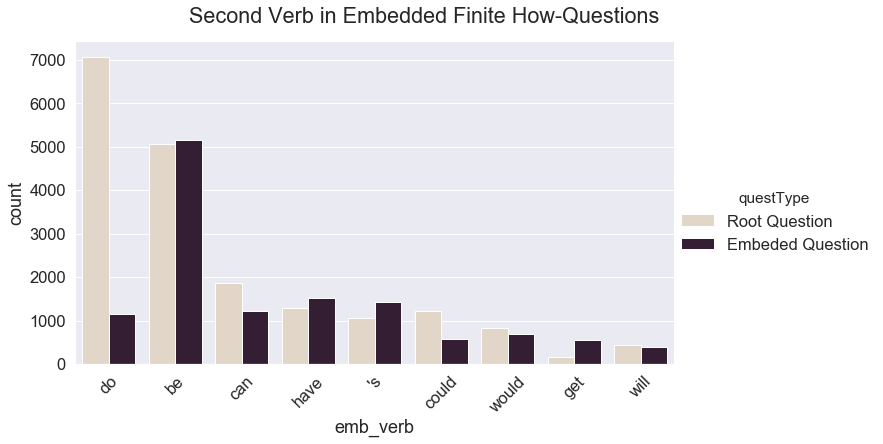

In [54]:

g = sns.catplot(x="emb_verb", y="count",hue="questType", kind="bar", data=how_evs_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Embedded Finite How-Questions')
g.set_xticklabels(rotation=45)

plt.show()